In [1]:
import numpy as np
from librosa.core import stft, istft
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd
from scipy import fftpack

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='3'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
fs = 512
window = 'ones'
center = False

# y_list = np.load('../y_list.npy')
s = np.linspace(0,10,fs*1)
y_list = np.sin(2*np.pi*1*s, dtype=np.float32) + np.sin(2*np.pi*2*s, dtype=np.float32) \
    + np.sin(2*np.pi*4*s, dtype=np.float32) + np.sin(2*np.pi*8*s, dtype=np.float32)  
y_torch = torch.tensor(y_list, dtype=torch.float)

y_torch = torch.tensor(y_list, dtype=torch.float)

n_bins=24*7

DFT_layer = Spectrogram.DFT(n_fft=512, hop_length=512//4, center=center, window=window)
spec = DFT_layer(y_torch)

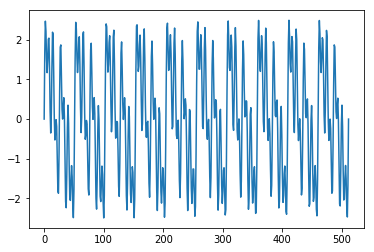

In [3]:
plt.plot(y_list)

In [4]:
real = spec[0]
imag = spec[1]

In [6]:
a, b = DFT_layer.inverse(real, imag)

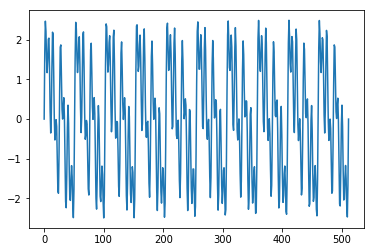

In [11]:
plt.plot(a[0].view(-1).cpu().numpy())

In [15]:
np.allclose(y_list, a[0].view(-1).cpu().numpy(),1)

True